<a href="https://colab.research.google.com/github/ceydaakbulut95/FUB-DeepLearning/blob/master/Project1%3AMaschinelles_Lernen_f%C3%BCr_Data_Science_W21_22.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Project 1 - Maschinelles Lernen für Data Science**
**Team:** <br>Ceyda Akbulut, 5389951<br>Hyosang Kim, 5566707<br>Raniyaharini Rajendran, 5566923

# **●Understanding the Dataset** <br>
Dataset name: Adult dataset<br>
Task: Classification<br>
Prediction: To determine whether a person makes over 50K a year.<br>
Labels: >50K,<=50K<br>
Dataset characteristics: Multivariate<br>
Attribute characteristics: Categorical, Integer<br>
Number of Instances(Total): 48842<br>
Number of Instances(Train):32561<br>
Number of Instances(Test):16281<br>
Number of Attributes:14


**Download Adult Dataset from UCI Machine Learning Repository**

In [ ]:
%%capture
%%bash
pip install imbalanced-learn

In [ ]:
#Read the libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from collections import Counter
from sklearn.datasets import make_classification

from imblearn.pipeline import make_pipeline
from imblearn.base import BaseSampler
from imblearn.under_sampling import RandomUnderSampler
from imblearn.over_sampling import RandomOverSampler 

import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)

In [ ]:
#Read adult.data as df (training part)
df_train = pd.read_csv('adult.data', header=None)

In [ ]:
#Read adult.data as df (testing part)
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
print(df_test.head(20))

                                                                                                                                                        |1x3 Cross validator
25  Private          226802  11th         7   Never-married       Machine-op-inspct  Own-child      Black               Male   0    0 40  United-States               <=50K.
38  Private          89814   HS-grad      9   Married-civ-spouse  Farming-fishing    Husband        White               Male   0    0 50  United-States               <=50K.
28  Local-gov        336951  Assoc-acdm   12  Married-civ-spouse  Protective-serv    Husband        White               Male   0    0 40  United-States                >50K.
44  Private          160323  Some-college 10  Married-civ-spouse  Machine-op-inspct  Husband        Black               Male   7688 0 40  United-States                >50K.
18  ?                103497  Some-college 10  Never-married       ?                  Own-child      White               Female 0    0 3

In [ ]:
#Show all columns to rename them
pd.set_option("display.max_columns", None)
#print(df_train.head(20))

In [ ]:
#Read adult.names to understand dataset description
my_file = open("adult.names", "r")
content = my_file.read()
#print(content)

In [ ]:
#Read old.adult.names files 
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
#print(content_old)

In [ ]:
#Generate column names manually and print df2_train again
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)
#print(df2_train.head(20))

In [ ]:
#Generate column names manually and print df2_test again
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)
#print(df2_train.head(20))

In [ ]:
#Combine test and train datasets(with indicator) to get to know our data and create the final dataset
main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")]) 
#!!!!!To separate thema again: test, train = df[df["ind"].eq("df2_test")], df[df["ind"].eq("df2_train")]
#print(main_data.shape)
#print(main_data.head(20))
#print(main_data.tail(20))
#Note: First row is not useful. Therefore, we will remove it.

In [ ]:
#Delete the first row since it has no meaning 
main_data.drop(index=main_data.index[0],axis=0,inplace=True)
#We executed the code line above. So, we can show it as a comment.
#print(main_data.shape)
#print(main_data.head(20))

# ● **Data preprocessing/Cleaning** <br>
■ Data integration:

*  Integration of multiple databases, data warehouses, or files (entity identification, value resolution)

■ Data cleaning:<br>

*   Fill in missing values
*   Smooth noisy data
*   Identify or remove outliers
*   Resolve inconsistencies

■ Data reduction:<br>

*   Duplicate elimination

# 3.1 Exploratory data analysis

# ● Univariate analysis <br>
○ Plot the value of each feature (boxplot, histogram, etc.). What do you
observe? <br>
○ Check for class imbalance. If existing, what are its effects? How can
you cope with it?<br>


Univariate analysis is perhaps the simplest form of statistical analysis. Like other forms of statistics, it can be inferential or descriptive. The key fact is that only one variable is involved.<br>*(https://en.wikipedia.org/wiki/Univariate_analysis)*<br>

**Continuous Variables:** In case of continuous variables, we need to understand the central tendency and spread of the variables.These are measured using various statistical metrics visualization methods as shown below: <br>

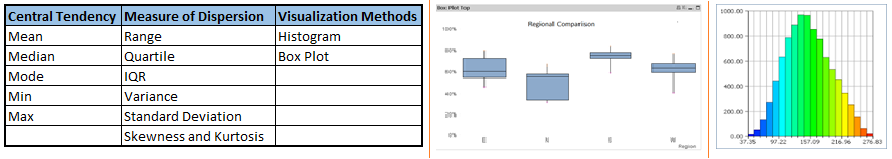<br>

**Categorical Variables:** For categorical variables, we’ll use frequency table to understand distribution of each category.<br>
*(https://www.analyticsvidhya.com/blog/2016/01/guide-data-exploration/)*



In [ ]:
#Missing data can occur when no information is provided for one or more items or for a whole unit. Missing data is a very big problem in a real-life scenarios.
#Check if there is any missing value with isna() function and sum to count the NaN values
main_data.isna().sum() 
#As a result, there is no missing value result.But without NaN value, we have '?' in our dataset. 

age               0
workclass         1
fnlwgt            1
education         1
education-num     1
marital-status    1
occupation        1
relationship      1
race              1
sex               1
capital-gain      1
capital loss      1
hours-per-week    1
native-country    1
result            1
ind               0
dtype: int64

If we handle missing values of categorical variables, there are 4 main steps as below.


1.   Ignore observation.
2.   **Replace by most frequent value (Mode).**
3.   Develop a model to predict missing values.
4.   Treat missing data as just another category.

We will choose **second option** for our dataset.




In [ ]:
#To see the frequency list of each column to understand which columns include '?' as a value.
main_data.loc[main_data['native-country'].str.contains('\?')].head(10)
#main_data['age'].value_counts()
#main_data['workclass'].value_counts()
#main_data['fnlwgt'].value_counts()
#main_data['education'].value_counts()
#main_data['education-num'].value_counts()
#main_data['occupation'].value_counts()
#main_data['relationship'].value_counts()
#main_data['race'].value_counts()
#main_data['sex'].value_counts()
#main_data['capital-gain'].value_counts()
#main_data['capital loss'].value_counts()
#main_data['hours-per-week'].value_counts()
#main_data['native-country'].value_counts()
#main_data['result'].value_counts()



ValueError: ignored

The column list has '?' as a value. We can see them with the help of the frequency table.



1.   workclass
2.   occupation
3.   native-country






In [ ]:
#Let's start with 'workclass'
main_data['workclass'].value_counts()
#Mode is 'Private' for this column. We will replace ? to Private as we agreed above.

 Private             33906
 Self-emp-not-inc     3862
 Local-gov            3136
 ?                    2799
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [ ]:
#Replace '?' to ''Private'.
main_data['workclass'].loc[main_data['workclass'].str.contains('\?')]=' Private'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['workclass'].value_counts()

 Private             36705
 Self-emp-not-inc     3862
 Local-gov            3136
 State-gov            1980
 Self-emp-inc         1695
 Federal-gov          1432
 Without-pay            21
 Never-worked           10
Name: workclass, dtype: int64

In [ ]:
#Now,we will continue with 'occupation'.
main_data['occupation'].value_counts()
#Mode is 'Prof-specialty' for this column. 

 Prof-specialty       6172
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5610
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 ?                    2809
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Replace '?' to 'Prof-specialty'
main_data['occupation'].loc[main_data['occupation'].str.contains('\?')]=' Prof-specialty'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['occupation'].value_counts()

 Prof-specialty       8981
 Craft-repair         6112
 Exec-managerial      6086
 Adm-clerical         5610
 Sales                5504
 Other-service        4923
 Machine-op-inspct    3022
 Transport-moving     2355
 Handlers-cleaners    2072
 Farming-fishing      1490
 Tech-support         1446
 Protective-serv       983
 Priv-house-serv       242
 Armed-Forces           15
Name: occupation, dtype: int64

In [ ]:
#Now,we will continue with 'native-country'.
main_data['native-country'].value_counts()
#Mode is 'United-States' for this column. 

 United-States                 43831
 Mexico                          951
 ?                               857
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 

In [ ]:
#Replace '?' to 'United-States'
main_data['native-country'].loc[main_data['native-country'].str.contains('\?')]=' United-States'

/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Check frequency table again to be sure if there is '?', or not.
main_data['native-country'].value_counts()

 United-States                 44688
 Mexico                          951
 Philippines                     295
 Germany                         206
 Puerto-Rico                     184
 Canada                          182
 El-Salvador                     155
 India                           151
 Cuba                            138
 England                         127
 China                           122
 South                           115
 Jamaica                         106
 Italy                           105
 Dominican-Republic              103
 Japan                            92
 Guatemala                        88
 Poland                           87
 Vietnam                          86
 Columbia                         85
 Haiti                            75
 Portugal                         67
 Taiwan                           65
 Iran                             59
 Greece                           49
 Nicaragua                        49
 Peru                             46
 

In [ ]:
#main_data['occupation'].value_counts()
#main_data['native-country'].value_counts()
#main_data['workclass'].value_counts()
#main_data['age'].value_counts()
#main_data['race'].value_counts()
main_data['education'].value_counts()
#main_data['relationship'].value_counts()

 HS-grad         15784
 Some-college    10878
 Bachelors        8024
 Masters          2657
 Assoc-voc        2061
 11th             1812
 Assoc-acdm       1601
 10th             1389
 7th-8th           955
 Prof-school       834
 9th               756
 12th              657
 Doctorate         594
 5th-6th           509
 1st-4th           247
 Preschool          83
Name: education, dtype: int64

In [ ]:
#Check main_data again.
print(main_data.shape)
print(main_data.head(10))

(48841, 16)
   age          workclass    fnlwgt      education  education-num  \
1   25            Private  226802.0           11th            7.0   
2   38            Private   89814.0        HS-grad            9.0   
3   28          Local-gov  336951.0     Assoc-acdm           12.0   
4   44            Private  160323.0   Some-college           10.0   
5   18            Private  103497.0   Some-college           10.0   
6   34            Private  198693.0           10th            6.0   
7   29            Private  227026.0        HS-grad            9.0   
8   63   Self-emp-not-inc  104626.0    Prof-school           15.0   
9   24            Private  369667.0   Some-college           10.0   
10  55            Private  104996.0        7th-8th            4.0   

         marital-status          occupation    relationship    race      sex  \
1         Never-married   Machine-op-inspct       Own-child   Black     Male   
2    Married-civ-spouse     Farming-fishing         Husband   White 

array([[<matplotlib.axes._subplots.AxesSubplot object at 0x7fb4eb305e90>,
      dtype=object)

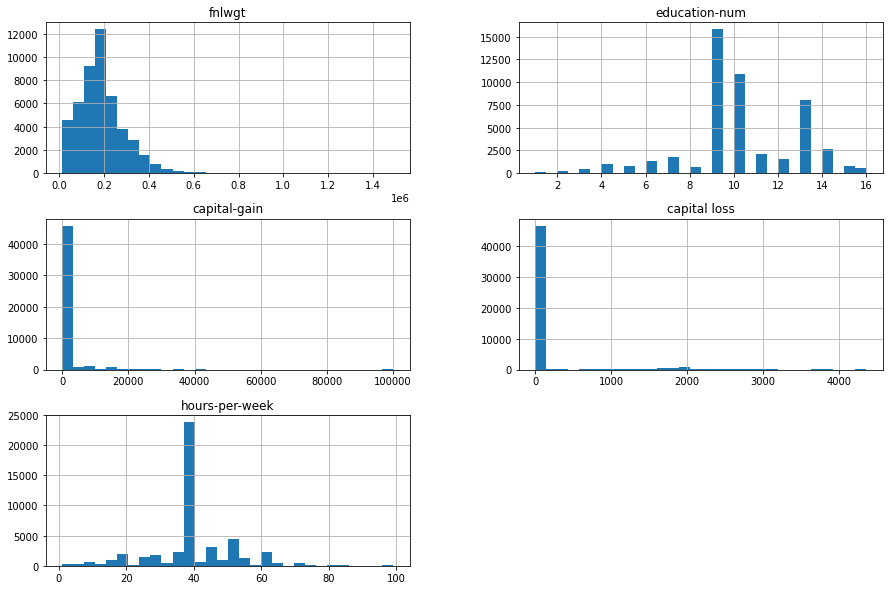

In [ ]:
#Plot a histogram for each numerical attribute in the main_data
main_data.hist(bins=30, figsize=(15, 10))

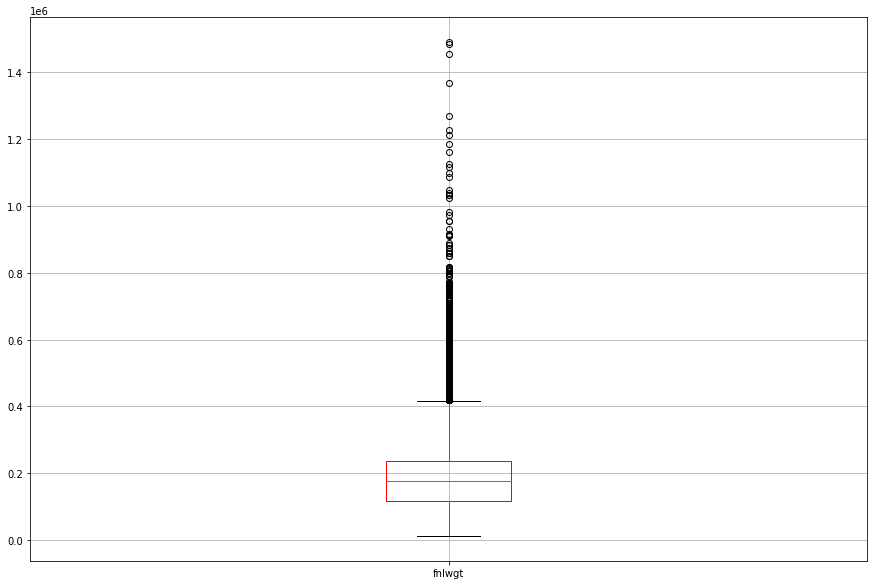

In [ ]:
#Plot a boxplot for each numerical attribute in the main_data.
#Boxplot for 'fnlwgt'.
boxplot = main_data.boxplot(column=['fnlwgt'],figsize=(15, 10),boxprops=dict(color='red'))

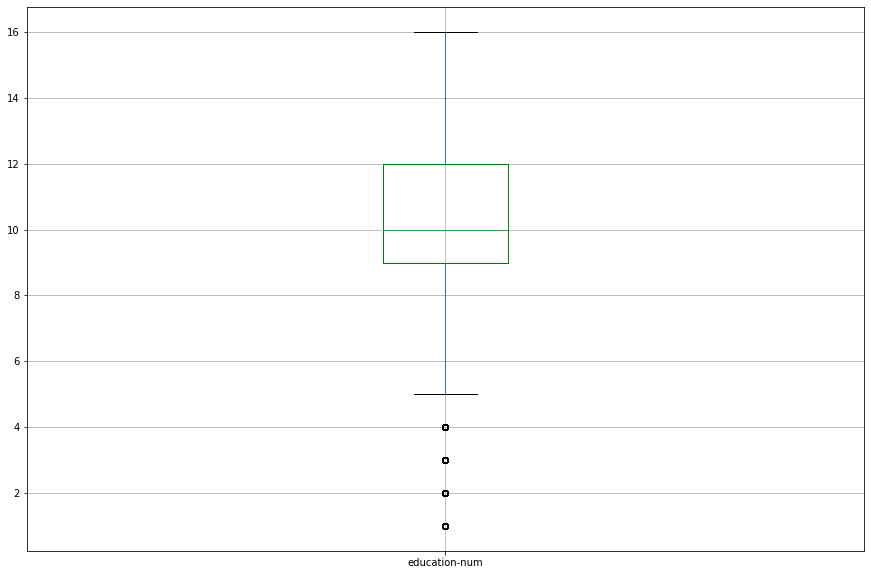

In [ ]:
#Boxplot for 'education-num'.
boxplot = main_data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='green'))

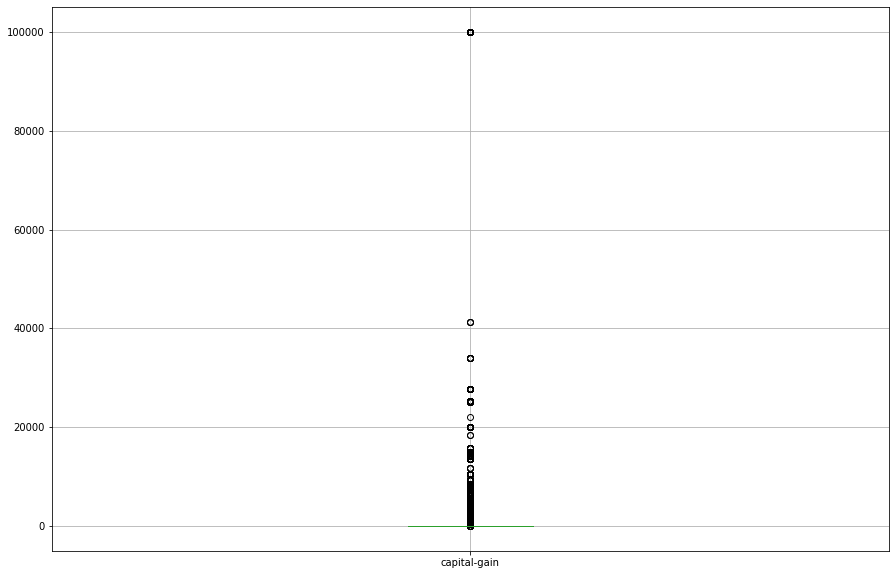

In [ ]:
#Boxplot for 'capital-gain'.
boxplot = main_data.boxplot(column=['capital-gain'],figsize=(15, 10),boxprops=dict(color='blue'))

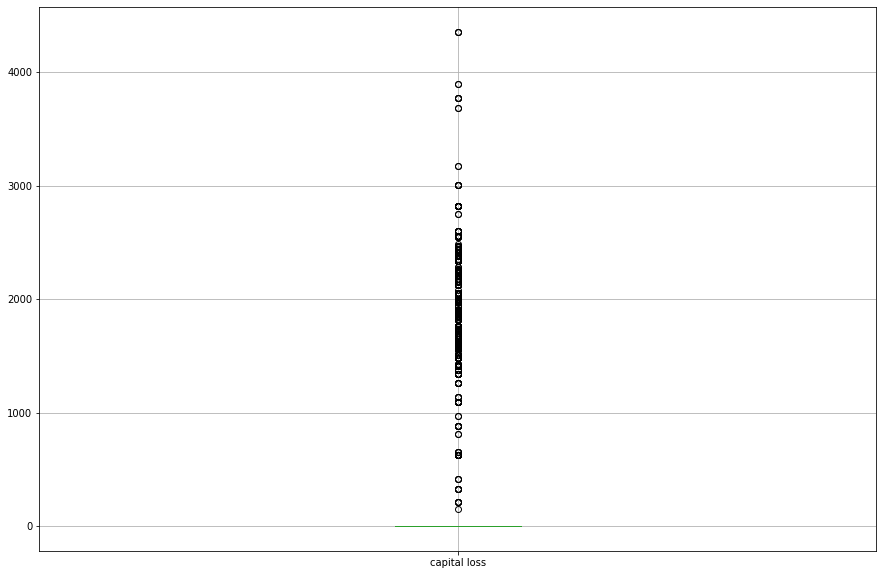

In [ ]:
#Boxplot for 'capital loss'.
boxplot = main_data.boxplot(column=['capital loss'],figsize=(15, 10),boxprops=dict(color='red'))

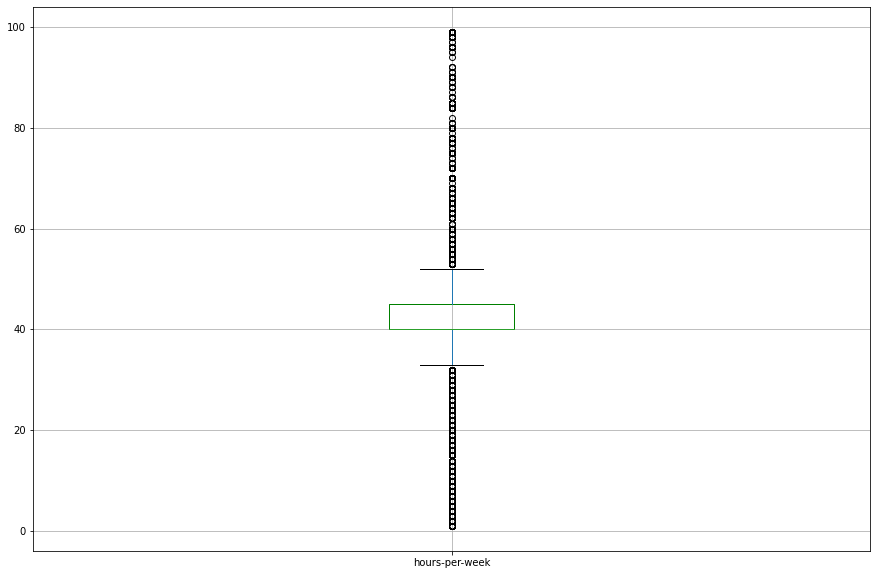

In [ ]:
#Boxplot for 'hours-per-week'.
boxplot = main_data.boxplot(column=['hours-per-week'],figsize=(15, 10),boxprops=dict(color='green'))

# **Four Outlier Detection Techniques**

1.   **Numeric Outlier**<br>
This is the simplest, nonparametric outlier detection method in a one dimensional feature space. Here outliers are calculated by means of the IQR (InterQuartile Range).The first and the third quartile (Q1, Q3) are calculated. An outlier is then a data point x_i that lies outside the interquartile range. Using the interquartile multiplier value k=1, the range limits are the typical upper and lower whiskers of a box plot.

2.   Z-Score
3.   DBSCAN
4.   Isolation Forest

For our dataset, we will interpret boxplots & histograms and apply the first one, Numeric Outlier.




In [ ]:
#Write a function to calculate IOR for each numerical attribute and show skewness
def detection_outlier(dfcolumn):
#Calculate Q1, Q3 and IQR
 Q1 = dfcolumn.quantile(0.25)
 Q3 = dfcolumn.quantile(0.75)
 IQR = Q3-Q1 #Interquartile range
#In general, constant should be 1.
 lower  = Q1-1*IQR
 higher = Q3+1*IQR
#Find number of outliers for specific column
 print('Before data preprocessing:')
 print('Skewness:',dfcolumn.skew())
 print(dfcolumn.describe())
 dfcolumn.loc[(dfcolumn> higher) | (dfcolumn< lower)]=dfcolumn.mean()
 print('After replacing outliers by mean:')
 print('Skewness:',dfcolumn.skew())
 print('Median:',dfcolumn.median())
 print('IQR value:',IQR)
 print('Lower,Higher:',lower,',',higher)
 return 

# **How to handle Outliers?**


1.   Set up a filter in your testing tool.
2.   Remove or change outliers during post-test analysis.
3.  **Change the value of outliers.**
4.   Consider the underlying distribution
5.   Consider the value of mild outliers.


To remove outliers, we will change the value of outliers. Deleting observations is not logical because of amount of the outliers. We also don't know if these are natural outliers or artificials. <br>
**Note1:** If the skewness is between -0.5 and 0.5, the data are fairly symmetrical. If the skewness is between -1 and – 0.5 or between 0.5 and 1, the data are moderately skewed. If the skewness is less than -1 or greater than 1, the data are highly skewed.<br>
**Sub-result1:** Replacing the values of outliers with median was not effective(Tried).<br>
**Sub-result2:** As a second method, we tried to remove outliers from our dataframe by IQR method. It was not efficient.<br>
**Sub-result3:** Log transformation was also not effective for outliers.<br>
**Sub-result4:** Z-score was also not effective for outliers.<br>
**Result:** We found the outliers with the help of IOR method(numeric values) and changed the values of outliers by mean for each column.


In [ ]:
detection_outlier(main_data['fnlwgt'])

Before data preprocessing:
Skewness: 1.4388862793258443
count    4.884100e+04
mean     1.896664e+05
std      1.056039e+05
min      1.228500e+04
25%      1.175550e+05
50%      1.781470e+05
75%      2.376460e+05
max      1.490400e+06
Name: fnlwgt, dtype: float64
After replacing outliers by mean:
Skewness: 0.15564508961150672
Median: 178147.0
IQR value: 120091.0
Lower,Higher: -2536.0 , 357737.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['capital-gain'])

Before data preprocessing:
Skewness: 11.894554083731773
count    48841.000000
mean      1079.045208
std       7452.093700
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max      99999.000000
Name: capital-gain, dtype: float64
After replacing outliers by mean:
Skewness: 3.032809452291708
Median: 0.0
IQR value: 0.0
Lower,Higher: 0.0 , 0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['capital loss'])

Before data preprocessing:
Skewness: 4.569755567864217
count    48841.000000
mean        87.504105
std        403.008483
min          0.000000
25%          0.000000
50%          0.000000
75%          0.000000
max       4356.000000
Name: capital loss, dtype: float64
After replacing outliers by mean:
Skewness: 4.2956796240515205
Median: 0.0
IQR value: 0.0
Lower,Higher: 0.0 , 0.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['hours-per-week'])

Before data preprocessing:
Skewness: 0.2387451287751267
count    48841.000000
mean        40.422391
std         12.391571
min          1.000000
25%         40.000000
50%         40.000000
75%         45.000000
max         99.000000
Name: hours-per-week, dtype: float64
After replacing outliers by mean:
Skewness: 1.470243153320307
Median: 40.0
IQR value: 5.0
Lower,Higher: 35.0 , 50.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
detection_outlier(main_data['education-num'])

Before data preprocessing:
Skewness: -0.3164944195509983
count    48841.000000
mean        10.078029
std          2.570965
min          1.000000
25%          9.000000
50%         10.000000
75%         12.000000
max         16.000000
Name: education-num, dtype: float64
After replacing outliers by mean:
Skewness: 0.3819504898778172
Median: 10.0
IQR value: 3.0
Lower,Higher: 6.0 , 15.0


/usr/local/lib/python3.7/dist-packages/pandas/core/indexing.py:670: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  iloc._setitem_with_indexer(indexer, value)


In [ ]:
#Find duplicates in dataframe
duplicate = main_data[main_data.duplicated()]
pd.set_option("display.max_rows", None)  
print("Duplicate Rows :")
duplicate.head(10)

Duplicate Rows :


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital loss,hours-per-week,native-country,result,ind
865,24,Private,194630.000000,Bachelors,13.0,Never-married,Prof-specialty,Not-in-family,White,Male,0.0,0.0,35.000000,United-States,<=50K.,df2_test
3234,18,Private,161245.000000,11th,7.0,Never-married,Other-service,Own-child,White,Male,0.0,0.0,40.422391,United-States,<=50K.,df2_test
6051,21,Private,189666.430786,Some-college,10.0,Never-married,Prof-specialty,Own-child,White,Female,0.0,0.0,40.000000,United-States,<=50K.,df2_test
9487,23,Private,189666.430786,Bachelors,13.0,Never-married,Exec-managerial,Not-in-family,White,Male,0.0,0.0,40.422391,United-States,<=50K.,df2_test
9820,20,Private,189666.430786,Some-college,10.0,Never-married,Other-service,Own-child,White,Female,0.0,0.0,40.422391,United-States,<=50K.,df2_test
10625,22,Private,189666.430786,Some-college,10.0,Never-married,Craft-repair,Own-child,White,Male,0.0,0.0,40.000000,United-States,<=50K.,df2_test
11190,37,Private,52870.000000,Bachelors,13.0,Married-civ-spouse,Exec-managerial,Husband,White,Male,0.0,0.0,40.000000,United-States,<=50K.,df2_test
11213,29,Private,36440.000000,Bachelors,13.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.000000,United-States,<=50K.,df2_test
12176,18,Private,189666.430786,Some-college,10.0,Never-married,Adm-clerical,Not-in-family,White,Female,0.0,0.0,40.000000,United-States,<=50K.,df2_test
12950,18,Private,189666.430786,Some-college,10.0,Never-married,Sales,Own-child,White,Female,0.0,0.0,40.422391,United-States,<=50K.,df2_test


In [ ]:
#Drop dublicates
main_data.drop_duplicates()
#print(main_data.head(10))

In [ ]:
#boxplot = main_data.boxplot(column=['fnlwgt'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['capital-gain'],figsize=(15, 10),boxprops=dict(color='blue'))
#boxplot = main_data.boxplot(column=['capital loss'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['education-num'],figsize=(15, 10),boxprops=dict(color='red'))
#boxplot = main_data.boxplot(column=['hours-per-week'],figsize=(15, 10),boxprops=dict(color='green'))
main_data.hist(bins=30, figsize=(15, 10))

In [ ]:
test, train = main_data[main_data["ind"].eq("df2_test")], main_data[main_data["ind"].eq("df2_train")]

In [ ]:
#print(train.shape)
#print(test.shape)
train['result'].value_counts()
g = sns.countplot(train['result'])
g.set_xticklabels(['<=50K','>50K'])
plt.show()

In a binary classification problem with data samples from two groups, class imbalance occurs when one class, the minority group, contains significantly fewer samples than the other class, the majority group. Class imbalance is easily identified by looking at the distribution of the target class within  dataset. **As we can see easily, our dataset suffers the class imbalance problem**. <br>

When a class imbalance exists within the training data, machine learning models will typically over-classify the larger class(es) due to their increased prior probability. As a result, the instances belonging to the smaller class(es) are typically misclassified more often than those belonging to the larger class(es). <br> Other disadvantages:

*   Unequal Cost of Misclassification Errors
*   Skewed Class Distribution

*(https://towardsdatascience.com/training-models-on-imbalanced-data-561fa3f842b5)*

**To Combat Imbalanced Training Data**

In general, main option are as below: <br>
*   Collect More Data
*   Change Performance Metric
*   **Random Undersampling and Oversampling**
*   Try Different Algorithms
*   Try Penalized Models

We will continue with Random Undersampling and Oversampling. 













In [ ]:
print(train.head(10))

In [ ]:
#Prepare training dataset as inputs for oversample function
#print(train.head(10))
X=train.iloc[:, : 14]
y=train.iloc[:, 14: 15]
#print(X.head(10))
#print(y.head(10))

In [ ]:
#Use prepared RandomOverSampler function to solve class imbalance problem
oversample = RandomOverSampler(sampling_strategy='minority')
#Fit and apply the transform
X_over, y_over = oversample.fit_resample(X, y)

In [ ]:
#Combine outputs to obtain train dataset again and draw a graph to illustrate the distribution of labels
train=pd.merge(X_over, y_over, left_index=True, right_index=True)
#train.head(7)
print('After oversampling:',train.shape)
train['result'].value_counts()
g = sns.countplot(train['result'])
g.set_xticklabels(['<=50K','>50K'])

In [ ]:
#Check the inputs and outputs
print(X.shape,y.shape)
print(X_over.shape,y_over.shape)
print(X_over.head(5))
print(y_over.head(5))

In [ ]:
#Combine test and train datasets
main_data = pd.concat([test.assign(ind="test"), train.assign(ind="train")]) 

# ● Bivariate analysis / Checking for correlations <br>
○ Plot the correlation matrix. Use colors to indicate the intensity of
correlation. Are there correlated attributes? <br>

**Note**: Bivariate analysis is one of the simplest forms of quantitative (statistical) analysis. It involves the analysis of two variables (often denoted as X, Y), for the purpose of determining the empirical relationship between them. <br>
*(https://en.wikipedia.org/wiki/Bivariate_analysis)* <br>

Correlation varies between -1 and +1.

*   -1: perfect negative linear correlation
*   +1:perfect positive linear correlation
*   No correlation

Correlation can be derived using following formula:


*   **Correlation = Covariance(X,Y) / SQRT( Var(X)* Var(Y))**





Features with high correlation are more linearly dependent and hence have almost the same effect on the dependent variable. So, when two features have high correlation, we can drop one of the two features.

In [ ]:
#Correlation matrix with colorful indicators
f = plt.figure(figsize=(19, 15))
plt.matshow(main_data.corr(), fignum=f.number)
plt.xticks(range(main_data.select_dtypes(['number']).shape[1]), main_data.select_dtypes(['number']).columns, fontsize=14, rotation=45)
plt.yticks(range(main_data.select_dtypes(['number']).shape[1]), main_data.select_dtypes(['number']).columns, fontsize=14)
cb = plt.colorbar()
cb.ax.tick_params(labelsize=14)
plt.title('Correlation Matrix', fontsize=16);

In [ ]:
#Correlation matrix with colorful indicators and corr. numbers
corr = main_data.corr()
corr.style.background_gradient(cmap='coolwarm')

# 3.2 Feature selection - Dataset preparation <br>
Based on the results of Section 3.1, consider whether you want to filter out some features (feature selection) or whether you want to create derived features (feature transformation). <br>
What is your final dataset to be used for classification? Please list and describe the selected features.<br>
----------------------------------------------------------------------------<br>

After completing the data preprocessing steps and checking the correlation matrix, we would like to continue with the same columns plus indicator column. This ind (test,train) column will be helpful when we want to divide a dataset to test and train parts. Since we applied the oversampling method, the new dimension of our dataset is (65719,16) in total (49438: train, 16281: test).

In [ ]:
print('Dimension of dataset:',main_data.shape)
print('General Info about dataset: \n')
main_data.info()

In [ ]:
print(main_data.head(10))
print(main_data.tail(10))

**K-nearest neighbors algorithm (k-NN)**

k-nearest neighbors algorithm (k-NN) is a non-parametric classification method. In k-NN classification, the output is a class membership. An object is classified by a plurality vote of its neighbors, with the object being assigned to the class most common among its knearest neighbors (k is a positive integer, typically small)

**Evaluation measures:**

**Confusion matrix:**
The confusion matrix is a way of tabulating the number of misclassifications

**Accuracy:**
Classification Accuracy is what we usually mean, when we use the term accuracy. It is the ratio of number of correct predictions to the total number of input samples.

*Accuracy = TP+TN/TP+FP+FN+TN*

**Precision:**
Precision is the ratio of correctly predicted positive observations to the total predicted positive observations.

*Precision = TP/TP+FP*

**Recall (Sensitivity):**
Recall is the ratio of correctly predicted positive observations to the all observations in actual class 

*Recall = TP/TP+FN*

**F1 score:**
F1 Score is the weighted average of Precision and Recall.

 F1 Score = 2*(Recall * Precision) / (Recall + Precision)  


In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
#import datasets

df_train = pd.read_csv('adult.data', header=None)
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
my_file = open("adult.names", "r")
content = my_file.read()
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)

names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)

main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")])
test, train = main_data[main_data["ind"].eq("df2_test")], main_data[main_data["ind"].eq("df2_train")]

X=train.iloc[:, :14]
y=train.iloc[:, 14]

#Assigning 0 for values <=50K and 1 for values >50K
y = np.array([0 if l == " <=50K" else 1 for l in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#To remove categorical and include only numerical values

X_train_numerical = X_train.select_dtypes(include = np.number).copy()
X_test_numerical = X_test.select_dtypes(include = np.number).copy()
#Performing knn classification

#KNN

classifier1 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 19, p= 1, weights= 'uniform')
classifier1.fit(X_train_numerical, y_train)
y_pred1 = classifier1.predict(X_test_numerical)

print('KNN')
print('-----Confusion Matrix-----')
print(confusion_matrix(y_test, y_pred1))
print('\n')
print('-----Classification Report-----')
print(classification_report(y_test, y_pred1))
print('\n')

#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier1, X_train_numerical, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print('\n')
#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier1, X_test_numerical, y_test) 
plt.show()
print('\n')

#plotting the decision boundary
X = np.asarray(X_train_numerical)
value = 1.5
width = 0.5
print('-----Decision boundary for KNN-----')
plot_decision_regions(X, y_train, clf=classifier1, legend=2, 
              feature_index=[0,2],                                 #these one will be plotted  
              filler_feature_values={1: value, 3:value, 4:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width, 4:width})
plt.show()

#Use the validation set to find the best parameters for each classifier
#GridSearchCV is used for finding the best parameters

grid_params = {
    'n_neighbors': [3,5,7,9,11,13,15,17,19,21,23],
    'p': (1,2),
    'weights':['uniform', 'distance'],
    'metric':['euclidean','manhattan', 'minkowski']
}
g = GridSearchCV(KNeighborsClassifier(algorithm='auto'), 
    grid_params,
    verbose=1,
    cv=3,
    n_jobs=-1
)
print('-----Best Parameters-----')
g_results = g.fit(X_train_numerical, y_train)
print("Best Score: " , g_results.best_score_)
print("Best Estimator: " , g_results.best_estimator_)
print("Best Params: " , g_results.best_params_)



**Decision tree:**

Decision Trees (DTs) are a non-parametric supervised learning method used for classification and regression. The goal is to create a model that predicts the value of a target variable by learning simple decision rules inferred from the data features

In [ ]:
print('Decision Tree')
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
#import datasets

df_train = pd.read_csv('adult.data', header=None)
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
my_file = open("adult.names", "r")
content = my_file.read()
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)

names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)

main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")])
test, train = main_data[main_data["ind"].eq("df2_test")], main_data[main_data["ind"].eq("df2_train")]

X=train.iloc[:, :14]
y=train.iloc[:, 14]

#Assigning 0 for values <=50K and 1 for values >50K
y = np.array([0 if l == " <=50K" else 1 for l in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#To remove categorical and include only numerical values

X_train_numerical = X_train.select_dtypes(include = np.number).copy()
X_test_numerical = X_test.select_dtypes(include = np.number).copy()
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train_numerical, y_train)

y_pred2 = classifier2.predict(X_test_numerical)

print('-----Confusion Matrix-----')
print(confusion_matrix(y_test, y_pred2))
print('\n')
print('-----Classification Report-----')
print(classification_report(y_test, y_pred2))
print('\n')


#cross validation
print('-----Cross Validation for Decision Tree-----')
print('\n')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier2, X_train_numerical, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier2, X_test_numerical, y_test) 
plt.show()
print('\n')

#plotting the decision boundary
X = np.asarray(X_train_numerical)
value = 1.5
width = 0.5
plot_decision_regions(X, y_train, clf=classifier2, legend=2, 
              feature_index=[0,2],                                 #these one will be plotted  
              filler_feature_values={1: value, 3:value, 4:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width, 4:width})
plt.show()

#Use the validation set to find the best parameters for each classifier
#GridSearchCV is used for finding the best parameters

param_dict = {
    "criterion":["gini","entropy"],
    "max_depth":range(1,15),
    "min_samples_split":range(1,10),
    "min_samples_leaf":range(1,5)
}

print('-----Best Parameters-----')
grid = GridSearchCV(classifier2, param_grid=param_dict, cv=5, verbose=1, n_jobs=-1)
time0 = time.time()
grid.fit(X_train_numerical, y_train)
time1 = time.time()
train_time = time1 - time0
print("DT Training Time: ", train_time)
dt_params = grid.best_params_
print("Best DT parameters by GridSearch: ", dt_params)
# prediction/inference time
t0 = time.time()
dt_pred_y = grid.predict(X_test_numerical)
t1 = time.time()
testing_time = t1 - t0
print("Testing time in seconds: ", testing_time)

**Naive Bayes:**

Naive Bayes methods are a set of supervised learning algorithms based on applying Bayes’ theorem with the “naive” assumption of conditional independence between every pair of features given the value of the class variable

In [ ]:
print('Naive Bayes')

classifier3 = GaussianNB()
classifier3.fit(X_train_numerical, y_train)

y_pred3 = classifier3.predict(X_test_numerical)


print('-----Confusion Matrix-----')
print(confusion_matrix(y_test, y_pred3))
print('\n')
print('-----Classification Report-----')
print(classification_report(y_test, y_pred3))
print('\n')


#cross validation
print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier3, X_train_numerical, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier3, X_test_numerical, y_test) 
plt.show()
print('\n')

#plotting the decision boundary
X = np.asarray(X_train_numerical)
value = 1.5
width = 0.5
plot_decision_regions(X, y_train, clf=classifier3, legend=2, 
              feature_index=[0,2],                                 #these one will be plotted  
              filler_feature_values={1: value, 3:value, 4:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width, 4:width})
plt.show()

#Use the validation set to find the best parameters for each classifier
#GridSearchCV is used for finding the best parameters

print('-----Best Parameters-----')
params_NB = {'var_smoothing': np.logspace(0,-9, num=100)}
gs_NB = GridSearchCV(classifier3, 
                 param_grid=params_NB, 
                 cv=5,   # use any cross validation technique 
                 verbose=1, 
                 scoring='accuracy') 
gs_NB.fit(X_train_numerical, y_train)

print(gs_NB.best_params_)

**Support vector machines:**

Support vector machines (SVMs) are a set of supervised learning methods Perceptron. Given a set of training examples, each marked as belonging to one of two categories, an SVM training algorithm builds a model that assigns new examples to one category or the other, making it a non-probabilistic binary linear classifier

In [ ]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split # Import train_test_split function
from sklearn import metrics #Import scikit-learn metrics module for accuracy calculation
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler
from sklearn.neighbors import KNeighborsClassifier
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score, GridSearchCV
from sklearn.metrics import roc_curve
from sklearn.metrics import auc
import matplotlib.pyplot as plt
from sklearn.metrics import roc_auc_score
import time
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import Perceptron
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import RandomizedSearchCV
from mlxtend.plotting import plot_decision_regions
#import datasets

df_train = pd.read_csv('adult.data', header=None) 
df_test = pd.read_csv('adult.test', error_bad_lines=False)
pd.set_option("display.max_columns", None)
my_file = open("adult.names", "r")
content = my_file.read()
my_file_old = open("old.adult.names", "r")
content_old = my_file_old.read()
names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_train = pd.read_csv('adult.data', names = names)

names=[ 'age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital loss','hours-per-week','native-country','result']
df2_test = pd.read_csv('adult.test', names = names)

main_data = pd.concat([df2_test.assign(ind="df2_test"), df2_train.assign(ind="df2_train")])
test, train = main_data[main_data["ind"].eq("df2_test")], main_data[main_data["ind"].eq("df2_train")]

X=train.iloc[:, :14]
y=train.iloc[:, 14]

#Assigning 0 for values <=50K and 1 for values >50K
y = np.array([0 if l == " <=50K" else 1 for l in y])

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20)

#To remove categorical and include only numerical values

X_train_numerical = X_train.select_dtypes(include = np.number).copy()
X_test_numerical = X_test.select_dtypes(include = np.number).copy()
print('SVM')
classifier4 = SVC(kernel='rbf', random_state = 1)
classifier4.fit(X_train_numerical, y_train)

y_pred4 = classifier4.predict(X_test_numerical)

print('-----Confusion Matrix-----')
print(confusion_matrix(y_test, y_pred4))
print('\n')
print('-----Classification Report-----')
print(classification_report(y_test, y_pred4))
print('\n')

#cross validation
print('-----Cross Validation for SVM-----') 
print('\n')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier4, X_train_numerical, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print('\n')

#AUC plot and ROC curve
print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier4, X_test_numerical, y_test) 
plt.show()
print('\n')

#plotting the decision boundary
X = np.asarray(X_train_numerical)
value = 1.5
width = 0.5
plot_decision_regions(X, y_train, clf=classifier4, legend=2, 
              feature_index=[0,2],                                 #these one will be plotted  
              filler_feature_values={1: value, 3:value, 4:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width, 4:width})
plt.show()

#Use the validation set to find the best parameters for each classifier
#GridSearchCV is used for finding the best parameters

print('-----Best Parameters-----')
param_dict = {'C': [0.1,1, 10, 100], 'gamma': [1,0.1,0.01,0.001],'kernel': ['rbf', 'poly', 'sigmoid']}
grid = GridSearchCV(SVC(),param_dict,refit=True,verbose=2)
grid.fit(X_train_numerical,y_train)
print(grid.best_estimator_)

**Perceptron:**

A perceptron is a single-layer neural network. They consist of four main parts including input values, weights and bias, net sum, and an activation function


In [ ]:
from sklearn.linear_model import Perceptron
print('Perceptron')
classifier5 = Perceptron(tol=1e-3, random_state=0)
classifier5.fit(X_train_numerical, y_train)

y_pred = classifier5.predict(X_test_numerical)

print('-----Confusion Matrix-----')
print(confusion_matrix(y_test, y_pred))
print('\n')

print('-----Classification Report-----')
print(classification_report(y_test, y_pred))
print('\n')

#cross validation

print('-----Cross Validation-----')
kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=123)
cv_score = cross_val_score(classifier5, X_train_numerical, y_train,scoring = 'accuracy',cv = kfold)
print(cv_score)
print('\n')

#AUC plot and ROC curve

print('-----AUC Plot and ROC Curve-----')
metrics.plot_roc_curve(classifier5, X_test_numerical, y_test) 
plt.show()
print('\n')

#plotting the decision boundary
X = np.asarray(X_train_numerical)
value = 1.5
width = 0.5
plot_decision_regions(X, y_train, clf=classifier5, legend=2, 
              feature_index=[0,2],                                 #these one will be plotted  
              filler_feature_values={1: value, 3:value, 4:value},  #these will be ignored
              filler_feature_ranges={1: width, 3: width, 4:width})
plt.show()

3.4

**EFFECT OF MODEL PARAMETERS:**

**KNN**

Best Parameters:  {'metric': 'manhattan', 'n_neighbors': 17, 'p': 1, 'weights': 'uniform'}



**Decision tree:**

Best Parameters: {'criterion': 'gini', 'max_depth': 7, 'min_samples_leaf': 3, 'min_samples_split': 2}

**Naive Bayes:**

Best Parameters: {'var_smoothing': 1.2328467394420658e-05}

**SVM:**

Best Parameters: {C=0.1, gamma=1, kernel=rbf; total time= 1.1min}


# 3-5. Fairness-awareness learning setup 


Input: D = training dataset

F: set of non-protected attributes. 

S: protected attribute (single or binary)

y: class attribute{+,-}


Given your final trained model,

observe whether its predictions for different genders, namely ‘male’ and ‘female’ vary

    1. Statistical parity Difference 

    2. Equal Opportunity

    3. Disparate Measurement
    
Also, compare the above measurements with the evaluation results from the classifiers with numerical values.
 
    1. KNN
    2. Decision Tree
    3. Naive-Bayes
    4. SVM
    5. Perceptron

Dataset:  X_test_numerical, X_test[‘sex’], y_test, y_pred
 
Data = x { X_test_numerical, X_test[‘sex] }
 
Protected attribute = s { ‘ Female’, ‘ Male’ }
 
Predicted outcome = y_hat {0, 1}
 
Real class value = y {0, 1}

In [ ]:
# 3-5. Discriptive behaviors

# To calculate the conditinoal probability, 
# Merge 'X_test_numerical' and 'sex' column from 'X_test' (no changes in number of rows)  

new_X = pd.merge(X_test_numerical, X_test['sex'], left_index=True, right_index=True)

In [ ]:
new_X

In [ ]:
# Prepare the classified results for measuring fairness.

In [ ]:
# KNN

# Prepare the y_pred1 column with code from previous parts
classifier1 = KNeighborsClassifier(metric= 'manhattan', n_neighbors= 19, p= 1, weights= 'uniform')
classifier1.fit(X_train_numerical, y_train)
y_pred1 = classifier1.predict(X_test_numerical)

df_y_pred1 = pd.DataFrame(y_pred1)
df_y_pred1.index = list(new_X.index)
df_y_pred1.columns = ['y_pred1']

# y_test column

df_y_test = pd.DataFrame(y_test)
df_y_test.index = list(new_X.index)
df_y_test.columns = ['y_test']

# merge y_pred1, y_test, new_X dataframes
knn_result1 = pd.concat([new_X, df_y_pred1], axis = 1)
knn_result = pd.concat([knn_result1, df_y_test], axis = 1)

In [ ]:
knn_result

In [ ]:
# Decision Trees

#Prepare the y_pred2 column with code from previous parts.
classifier2 = DecisionTreeClassifier()
classifier2.fit(X_train_numerical, y_train)
y_pred2 = classifier2.predict(X_test_numerical)

df_y_pred2 = pd.DataFrame(y_pred2)
df_y_pred2.index = list(new_X.index)
df_y_pred2.columns = ['y_pred2']


# y_test column 
df_y_test


# merge y_pred2, y_test, new_X dataframes
dt_result1 = pd.concat([new_X, df_y_pred2], axis = 1)
dt_result = pd.concat([dt_result1, df_y_test], axis = 1)

In [ ]:
dt_result

In [ ]:
# Naive-Bayes 

# Prepare the y_pred3 column with code from previous parts.
classifier3 = GaussianNB()
classifier3.fit(X_train_numerical, y_train)
y_pred3 = classifier3.predict(X_test_numerical)

df_y_pred3 = pd.DataFrame(y_pred3)
df_y_pred3.index = list(new_X.index)
df_y_pred3.columns = ['y_pred3']

# y_test column
df_y_test

# merge y_pred3, y_test, new_X dataframes
nb_result1 = pd.concat([new_X, df_y_pred3], axis = 1)
nb_result = pd.concat([nb_result1, df_y_test], axis = 1)

In [ ]:
nb_result

In [ ]:
# SVM 

# Prepare the y_pred4 column with code from previous parts. 
classifier4 = SVC(kernel='rbf', random_state = 1)
classifier4.fit(X_train_numerical, y_train)
y_pred4 = classifier4.predict(X_test_numerical)

df_y_pred4 = pd.DataFrame(y_pred4)
df_y_pred4.index = list(new_X.index)
df_y_pred4.columns = ['y_pred4']

# y_test column 
df_y_test

# merge y_pred4, y_test, new_X dataframes 
svm_result1 = pd.concat([new_X, df_y_pred4], axis = 1)
svm_result = pd.concat([svm_result1, df_y_test], axis = 1)

In [ ]:
svm_result

In [ ]:
# Perceptron 

classifier5 = Perceptron(tol=1e-3, random_state=0)
classifier5.fit(X_train_numerical, y_train)
y_pred5 = classifier5.predict(X_test_numerical)

df_y_pred5 = pd.DataFrame(y_pred5)
df_y_pred5.index = list(new_X.index)
df_y_pred5.columns = ['y_pred5']

# y_test column 
df_y_test

# merge y_pred5, y_test, new_X dataframes 
perceptron_result1 = pd.concat([new_X, df_y_pred5], axis = 1)
perceptron_result = pd.concat([perceptron_result1, df_y_test], axis = 1)

In [ ]:
perceptron_result

## Statistical Parity Difference (SPD)
 
This evaluates that a predictor is unbiased if the prediction y_hat is independent of the protected attribute S so that 

 
**P(y_hat| S ) == P(y_hat)** 


This can be measured by checking the difference between the probability of prediction of y conditioned by whether s = ‘ Male’ or s = ‘ Female’. And the equation for measurement is,


**SPD = P( y_hat = 1 | S = ‘ Male’ ) – P( y_hat = 1 | S = ‘ Female’ )**


If subjects in both protected and unprotected groups should have equal probability of being assigned to the positive class. 


In [ ]:
# Functions for Measurement

In [ ]:
# 1. Statistical Parity Difference

# SPD = P(y_hat = + | S = not s) - P(y_hat = + | S = s)
# y_hat will be described as variables: y_pred_pos_l (left hand side), y_pred_pos_r (right hand side)

# class_y : > 50k == 1, <= 50k == 0

# Beforehand, check if there's more than two unique values in the column 'sex' -> NO
# knn_result['sex'].unique()

def statParityDif(dataset, protect_att, class_att):
    
    #Conditional on 'sex'
    malerows = dataset.loc[dataset[protect_att] == " Male"]
    malerows_pos = malerows.loc[dataset[class_att] == 1]
    y_pred_l = len(malerows_pos)
    
    femalerows = dataset.loc[dataset[protect_att] == " Female"]
    femalerows_pos = femalerows.loc[dataset[class_att] == 1]
    y_pred_r = len(femalerows_pos)
        
    lhs = y_pred_l/len(dataset)
    rhs = y_pred_r/len(dataset)
    
    return lhs-rhs

## **Equal Opportunity (EOD)**
 
It checks whether the true positive rate and false positive rate will be the same for each s value. If it is the case, there should be no difference in model’s prediction errors regarding the positive class and the measure should give the value zero. 
 
EOD = P( y_hat = 1 | y = 1, S = ‘ Male’ ) – P( y_hat = 1 | y = 1, S = ‘ Female’ )
 


In [ ]:
# 2. Equal Opportunity 

# Equal opportunity difference 
# EOD: P(y_hat != y | S = not s+) - P(y_hat != y | S = s +)
# With the same variable representation as Statistical Parity, 

def EqualOppDif(dataset, protect_att, class_att, y):
    
    #Conditional on 'sex'
    male_over50 = dataset.loc[(dataset[protect_att] == " Male") & (dataset[y] == 1)]
    y_pred_l = len(male_over50.loc[dataset[class_att] == 0])
    female_over50 = dataset.loc[(dataset[protect_att] == " Female") & (dataset[y] == 1)]
    y_pred_r = len(female_over50.loc[dataset[class_att] == 0])
    
    lhs = y_pred_l/len(male_over50)
    rhs = y_pred_r/len(female_over50)
    
    return lhs-rhs

## **Disparate Mistreatment**
 
 
With false negative rates (FNR) and false positive rates (FPR), we can check if there are difference in model’s prediction errors between protected and non-protected groups for both classes {0, 1}, and the equation is as follows. 
 
 
**d_FNR = P( y_hat != y | y = 1, S = ‘ Female’ ) - P( y_hat != y | y = 1, S = ‘ Male’ )**

**d_FPR = P( y_hat != y | y = 0, S = ‘ Female’ ) – P( y_hat != y | y = 0, S = ‘ Male’ )**
 
**Disparate Mistreatment = abs(d_FNR) + abs(d_FPR)**


In [ ]:
# 3. Disparate Mistreatment

# Disparate Mistreatment = ab(delta FNR) + ab(delta FPR)
# delta FNR = EOD
# delta FPR = P(y_hat != y | S = s -) - P(y_hat != y | S = not s -)



def DisparateMistreat(dataset, protect_att, class_att, y):
    
    # FNR
    female_over50 = dataset.loc[(dataset[protect_att] == " Female") & (dataset[y] == 1)]
    fnr_y_pred_l = len(female_over50.loc[dataset[class_att] == 0])
    male_over50 = dataset.loc[(dataset[protect_att] == " Male") & (dataset[y] == 1)]
    fnr_y_pred_r = len(male_over50.loc[dataset[class_att] == 0])
    
    fnr_lhs = fnr_y_pred_l/len(female_over50)
    fnr_rhs = fnr_y_pred_r/len(male_over50)
    
    # FPR
    female_under50 = dataset.loc[(dataset[protect_att] == " Female") & (dataset[y] == 0)]
    fpr_y_pred_l = len(female_under50.loc[dataset[class_att] == 1])
    male_under50 = dataset.loc[(dataset[protect_att] == " Male") & (dataset[y] == 0)]
    fpr_y_pred_r = len(male_under50.loc[dataset[class_att] == 1])
    
    fpr_lhs = fpr_y_pred_l/len(female_under50)
    fpr_rhs = fpr_y_pred_r/len(male_under50)
    
    return abs(fnr_lhs - fnr_rhs) + abs(fpr_lhs - fpr_rhs)


In [ ]:
# Measurement of 3 fairness measurements on each classifier. 

In [ ]:
# <1> KNN classifier

# 1. Statistical Parity Difference 
print("\nStaitistical Parity Difference for KNN\n=", statParityDif(knn_result, 'sex', 'y_pred1'))
knn_spd = statParityDif(knn_result, 'sex', 'y_pred1')

# 2. Equality Opportunity Difference 
print("\nEquality Opportunity Difference for KNN\n=", EqualOppDif(knn_result, 'sex', 'y_pred1', 'y_test'))
knn_eod = EqualOppDif(knn_result, 'sex', 'y_pred1', 'y_test')

# 3. Disparate Mistreatment 
print("\nDisparate Mistreatment for KNN\n=",DisparateMistreat(knn_result, 'sex', 'y_pred1', 'y_test'))
knn_dm = DisparateMistreat(knn_result, 'sex', 'y_pred1', 'y_test')


In [ ]:
# <2> Decision Tree classifier

# 1. Statistical Parity Difference 
print("\nStaitistical Parity Difference for Decision Tree\n=", statParityDif(dt_result, 'sex', 'y_pred2'))
dt_spd = statParityDif(dt_result, 'sex', 'y_pred2')

# 2. Equality Opportunity Difference 
print("\nEquality Opportunity Difference for Decision Tree\n=", EqualOppDif(dt_result, 'sex', 'y_pred2', 'y_test'))
dt_eod = EqualOppDif(dt_result, 'sex', 'y_pred2', 'y_test')

# 3. Disparate Mistreatment 
print("\nDisparate Mistreatment for Decision Tree\n=",DisparateMistreat(dt_result, 'sex', 'y_pred2', 'y_test'))
dt_dm = DisparateMistreat(dt_result, 'sex', 'y_pred2', 'y_test')


In [ ]:
# <3> Naive-Bayes classifier

# 1. Statistical Parity Difference 
print("\nStaitistical Parity Difference for Naive-Bayes \n=", statParityDif(nb_result, 'sex', 'y_pred3'))
nb_spd = statParityDif(nb_result, 'sex', 'y_pred3')

# 2. Equality Opportunity Difference 
print("\nEquality Opportunity Difference for Naive-Bayes \n=", EqualOppDif(nb_result, 'sex', 'y_pred3', 'y_test'))
nb_eod = EqualOppDif(nb_result, 'sex', 'y_pred3', 'y_test')

# 3. Disparate Mistreatment 
print("\nDisparate Mistreatment for Naive-Bayes \n=", DisparateMistreat(nb_result, 'sex', 'y_pred3', 'y_test'))
nb_dm = DisparateMistreat(nb_result, 'sex', 'y_pred3', 'y_test')


In [ ]:
# <4> SVM classifier

# 1. Statistical Parity Difference 
print("\nStaitistical Parity Difference for SVM\n=", statParityDif(svm_result, 'sex', 'y_pred4'))
svm_spd = statParityDif(svm_result, 'sex', 'y_pred4')

# 2. Equality Opportunity Difference 
print("\nEquality Opportunity Difference for SVM\n=", EqualOppDif(svm_result, 'sex', 'y_pred4', 'y_test'))
svm_eod = EqualOppDif(svm_result, 'sex', 'y_pred4', 'y_test')

# 3. Disparate Mistreatment 
print("\nDisparate Mistreatment for SVM\n=", DisparateMistreat(svm_result, 'sex', 'y_pred4', 'y_test'))
svm_dm = DisparateMistreat(svm_result, 'sex', 'y_pred4', 'y_test')


In [ ]:
# <5> Perceptron classifier

# 1. Statistical Parity Difference 
print("\nStaitistical Parity Difference for Perceptron\n=", statParityDif(perceptron_result, 'sex', 'y_pred5'))
perceptron_spd = statParityDif(perceptron_result, 'sex', 'y_pred5')

# 2. Equality Opportunity Difference 
print("\nEquality Opportunity Difference for Perceptron\n=", EqualOppDif(perceptron_result, 'sex', 'y_pred5', 'y_test'))
perceptron_eod = EqualOppDif(perceptron_result, 'sex', 'y_pred5', 'y_test')

# 3. Disparate Mistreatment 
print("\nDisparate Mistreatment for Perceptron\n=", DisparateMistreat(perceptron_result, 'sex', 'y_pred5', 'y_test'))
perceptron_dm = DisparateMistreat(perceptron_result, 'sex', 'y_pred5', 'y_test')


# Table and Chart to compare the results. 

In [ ]:
# vertical dataframe of knn classifier measures. 

temp = {
    'knn' : [knn_spd, knn_eod, knn_dm],
    'DecisionTree' : [dt_spd, dt_eod, dt_dm], 
    'NaiveBayes' : [nb_spd, nb_eod, nb_dm], 
    'SVM' : [svm_spd, svm_eod, svm_dm], 
    'Perceptron' : [perceptron_spd, perceptron_eod, perceptron_dm], 
    'Fair Range' : ['[-0.1, 0.1]', '[-0.1, 0.1]', '[-0.1, 0.1]']
       }

df = pd.DataFrame(temp)
df.index = ['SPD', 'EOD', 'DM']
df

In [ ]:
# Plot

barwidth = 0.15
fig = plt.subplots(figsize = (12,8))

tempdf = df.drop(['Fair Range'], axis = 1)

spd = np.array(tempdf.loc['SPD', :])
eod = np.array(tempdf.loc['EOD', :])
dm = np.array(tempdf.loc['DM', :])


br1 = np.arange(len(spd))
br2 = [x + barwidth for x in br1]
br3 = [x + barwidth for x in br2]

plt.bar(br1, spd, color = 'b', width = barwidth, edgecolor = 'grey', label = 'spd')
plt.bar(br2, eod, color = 'g', width = barwidth, edgecolor = 'grey', label = 'eod')
plt.bar(br3, dm, color = 'c', width = barwidth, edgecolor = 'grey', label = 'dm')
plt.axhline(y=0.1, color='r', linestyle='-')
plt.axhline(y= -0.1, color = 'r', linestyle = '-')

plt.xlabel('Classifier', fontweight = 'bold', fontsize = 15)
plt.ylabel('Measures', fontweight = 'bold', fontsize = 15)
plt.xticks([r + barwidth for r in range(len(spd))], ['KNN', 'DecisionTree', 'NaiveBayes', 'SVM', 'Perceptron'])

plt.legend()
plt.show()

# Result - Fairness of the measures

Except for the statistical parity difference of classifier Decision Tree, the measure values fall into the fair range [-0.1, 0.1]. The classifier Decision Tree shows slightly extreme values of measures compared to the other classifier. In conclusion there is no obvious discriminatory behavior from our training models.

# KNN Implementation 

We develoepd KNN implementation referring to the page 
https://machinelearningmastery.com/tutorial-to-implement-k-nearest-neighbors-in-python-from-scratch/. 



In [ ]:
# X_train_numerical and y_train dataset combined to be used

In [ ]:
df_y_train = pd.DataFrame(y_train)
df_y_train.index = list(X_train_numerical.index)
df_y_train.columns = ['y_train']

In [ ]:
X_train_numerical['distance'] = 0.0
X_trainset = pd.concat([X_train_numerical, df_y_train], axis = 1)

In [ ]:
# X_test_numerical and y_test dataset combined to be used

In [ ]:
X_test_numerical['distance'] = 0.0
df_y_test = pd.DataFrame(y_test)
df_y_test.index = list(X_test_numerical.index)
df_y_test.columns = ['y_test']
X_testset = pd.concat([X_test_numerical, df_y_test], axis = 1)
X_testset.head(10)

In [ ]:
# KNN Implementation functions

In [ ]:
import math

In [ ]:
# Getting the euclidean distance between two rows

def euclidistance(row1, row2):
    
    distance = 0.0
    
    for i in range(len(row1)):
        distance += (row1[i] - row2[i])**2
    
    return math.sqrt(distance)

# Getting the K-nearest neighbors of instance to the each row of the table
def k_neighbors(table, instance, k):
    
    neighbors = list()
    
    for i in range(len(table)):
        d = euclidistance(table.iloc[i], instance)
        table['distance'].iloc[i] = d
        
    table = table.sort_values(by = "distance")
    
    for j in range(k):
        neighbors.append(list(table.iloc[j]))
    
    return neighbors 

# By majority voting, classify the label of instance from the table
def classification(table, instance, k):
    neighbors = k_neighbors(table, instance, k)
    neighbor_class = [n[-1] for n in neighbors]
    classify = max(set(neighbor_class), key = neighbor_class.count)
    return classify

# KNN algorithm
def knn(train, test, k):
    predict_y = list()
    for i in range(len(test)):
        temp = classification(train, test.iloc[i] , k)
        predict_y.append(temp)
    return(predict_y)

## Result of KNN classifier from scratch 

In [ ]:
test_rows = X_testset.head(20)
pred_scratch = pd.DataFrame(knn(X_trainset, test_rows, 7))
pred_scratch.columns = ['y_pred_scratch']

In [ ]:
pred_scratch.index = list(test_rows.index)

In [ ]:
df_result_scratch = pd.concat([test_rows, pred_scratch], axis = 1)
df_result_scratch

In [ ]:
accuracy_scratch = sum(df_result_scratch['y_test'] == df_result_scratch['y_pred_scratch'])/len(test_rows)
print("The scratched KNN accuracy is: ", accuracy_scratch)

## Remark
The result is not possible to be obtained by the KNN algorithm that is made from the scratch, because of long run-time. However, we tried with smaller test set and observed it work out.

From the 20 instances of test, the prediction accuracy is turned out to be 0.75. 

## Improving run-time

## The slow running time of KNN
It is slow compared to the other training model. This is because the model could not generalize in advance rather it has to look up all the historical data and if the size of the data is big, it slows down the computing process. 

## The improvement 

If using cosine similarity than euclidean distance, the time complexity can be improved. Because euclidean includes more operations than cosine similarity. 

Cosine simliarity: the cosine of the angle between two n-dimensional vectors in an n-dimensional space. It is the dot product of the two vectors divided by the product of the two vectors' lengths (or magnitudes).

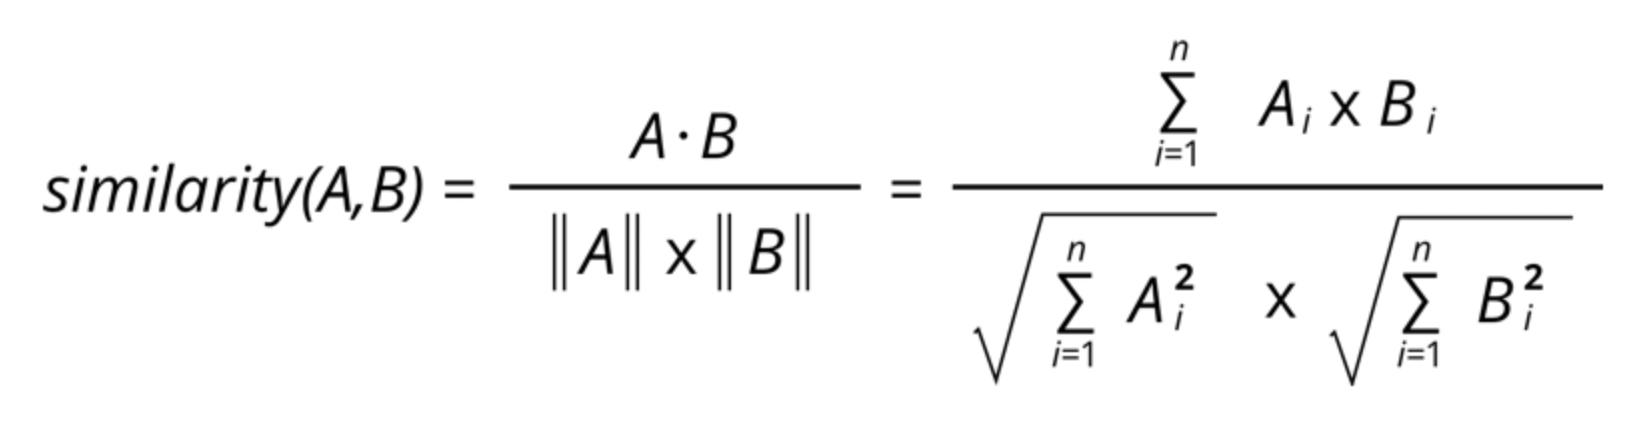

